In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
df.corr().T

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,1.000000,0.637918,-0.028350,0.056885,-0.029838,0.037714,-0.030172,-0.178862,-0.001651,-0.010678,0.243358
flight,0.637918,1.000000,-0.009443,0.071564,-0.118833,0.067175,-0.036248,-0.259531,0.205502,-0.000443,0.305872
source_city,-0.028350,-0.009443,1.000000,-0.004688,0.001819,0.044153,-0.222935,0.000075,0.008619,-0.003568,0.004594
departure_time,0.056885,0.071564,-0.004688,1.000000,-0.008518,-0.046282,-0.001761,-0.053340,0.084348,-0.001597,0.058319
stops,-0.029838,-0.118833,0.001819,-0.008518,1.000000,0.010515,-0.012846,0.100262,-0.473860,-0.007047,-0.202620
arrival_time,0.037714,0.067175,0.044153,-0.046282,0.010515,1.000000,-0.037431,-0.027647,0.008679,-0.004191,0.042043
destination_city,-0.030172,-0.036248,-0.222935,-0.001761,-0.012846,-0.037431,1.000000,0.001603,0.001736,-0.005323,0.004795
class,-0.178862,-0.259531,0.000075,-0.053340,0.100262,-0.027647,0.001603,1.000000,-0.138710,0.013039,-0.937860
duration,-0.001651,0.205502,0.008619,0.084348,-0.473860,0.008679,0.001736,-0.138710,1.000000,-0.039157,0.204222
days_left,-0.010678,-0.000443,-0.003568,-0.001597,-0.007047,-0.004191,-0.005323,0.013039,-0.039157,1.000000,-0.091949


In [ ]:
df.shape

(300153, 11)

In [ ]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

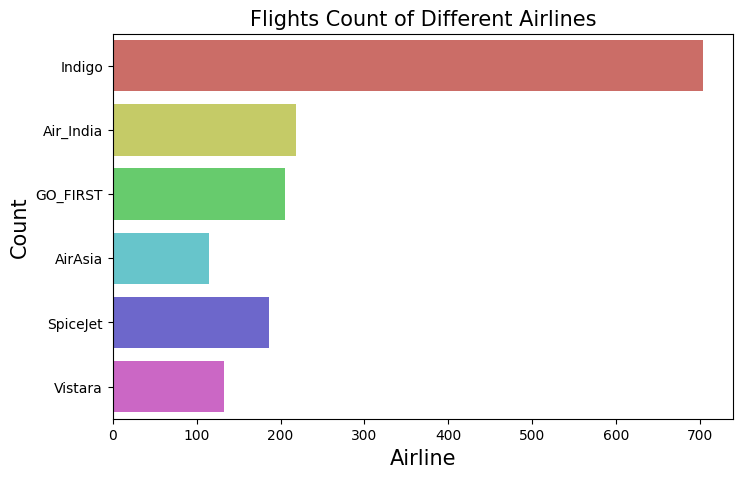

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(df1['airline'],palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [ ]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

class
Economy     1560
Business     295
Name: count, dtype: int64

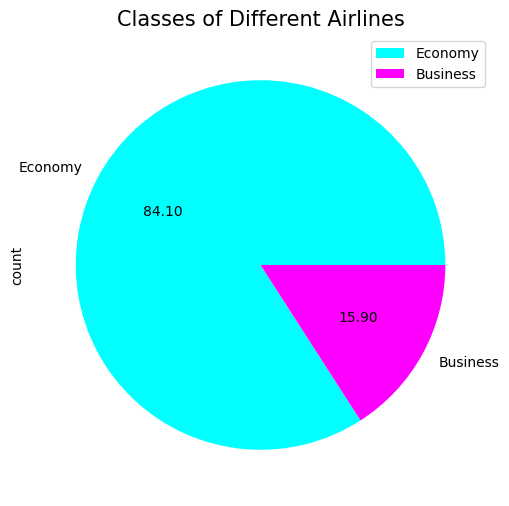

In [ ]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()


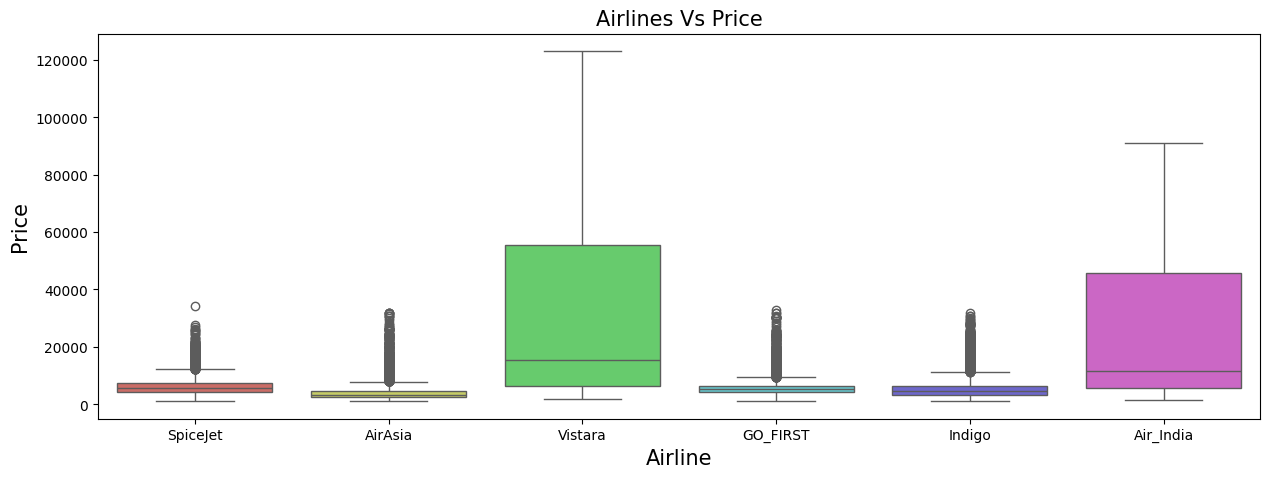

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

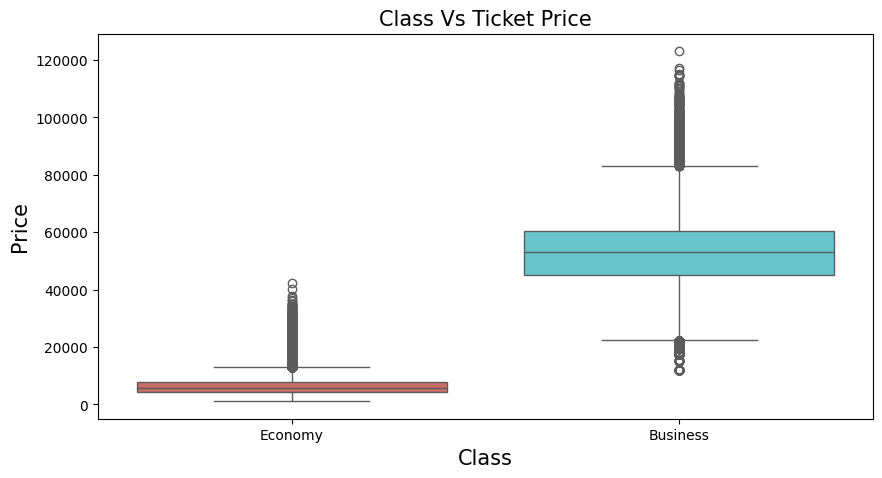

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

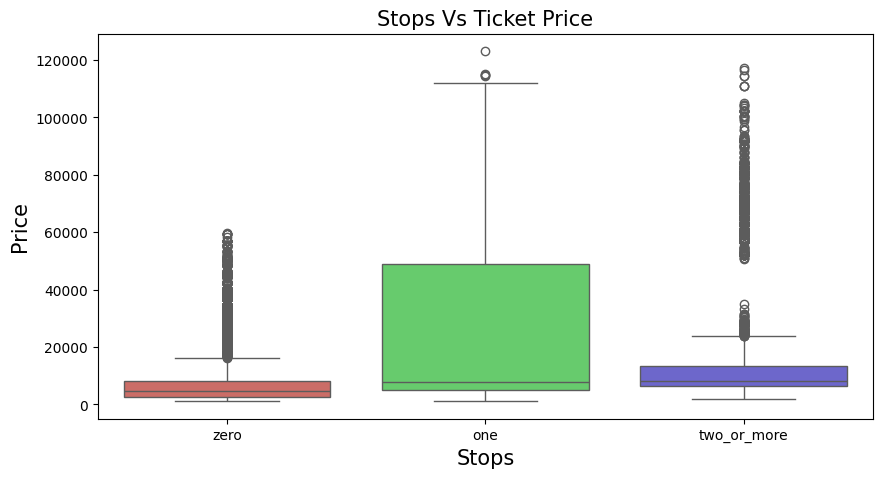

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

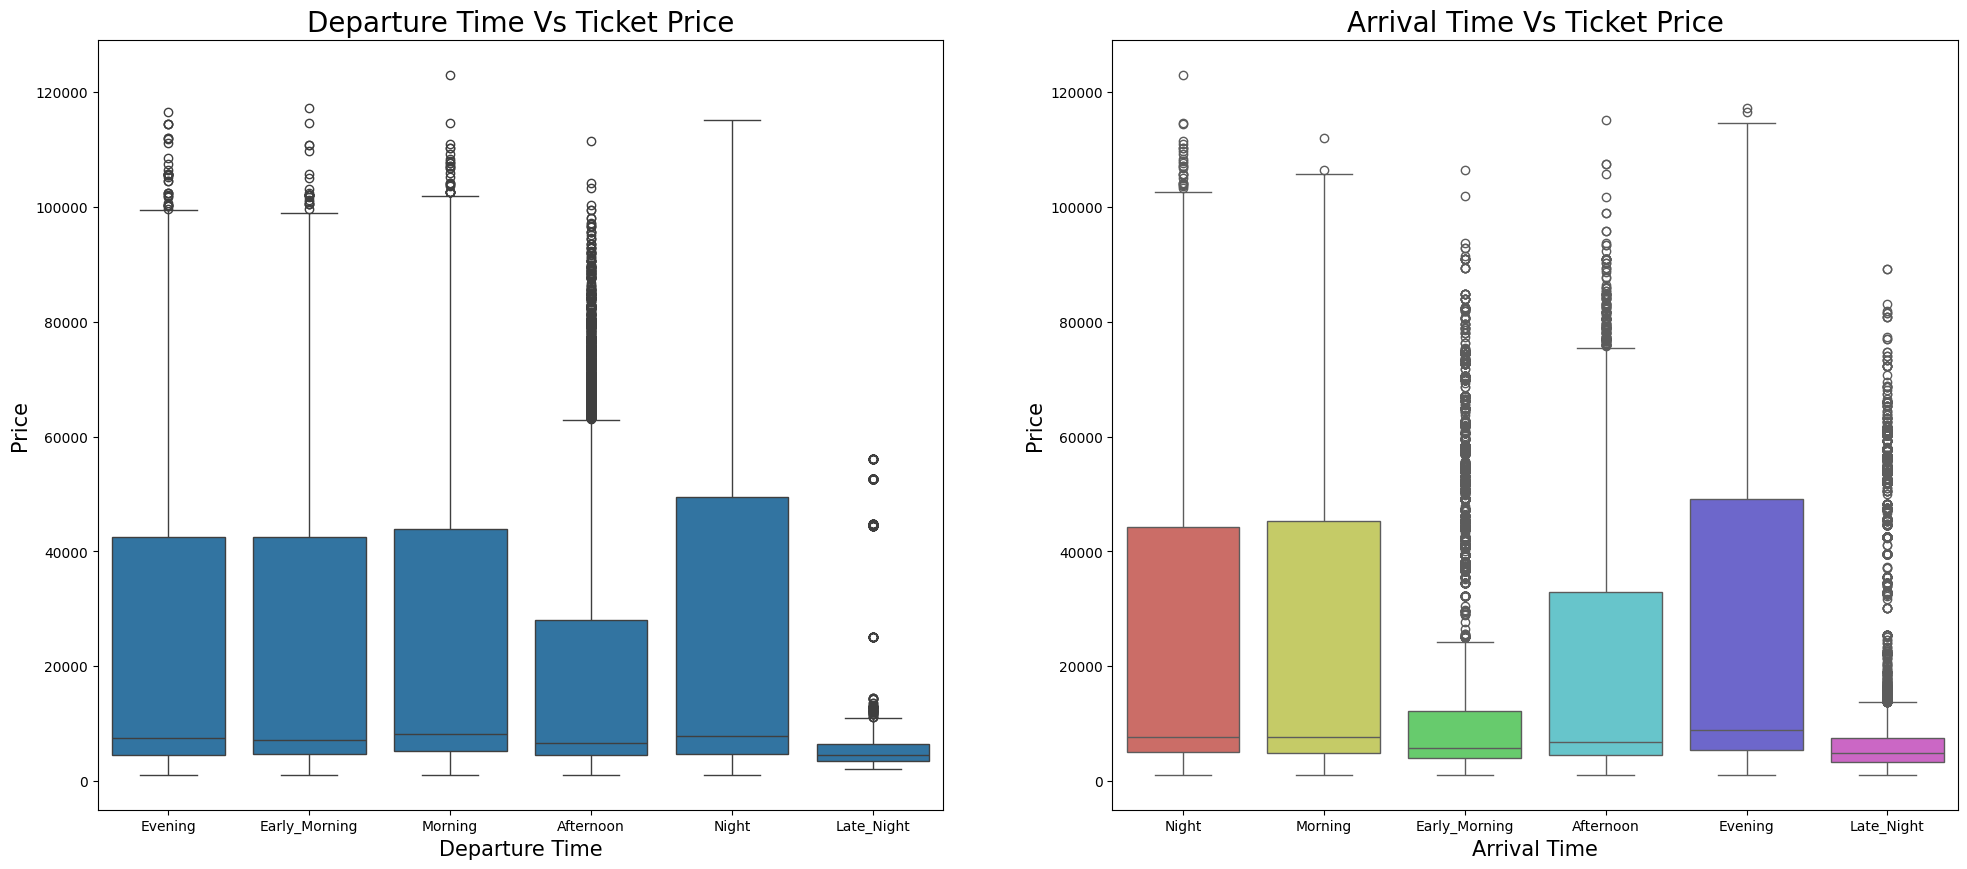

In [ ]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

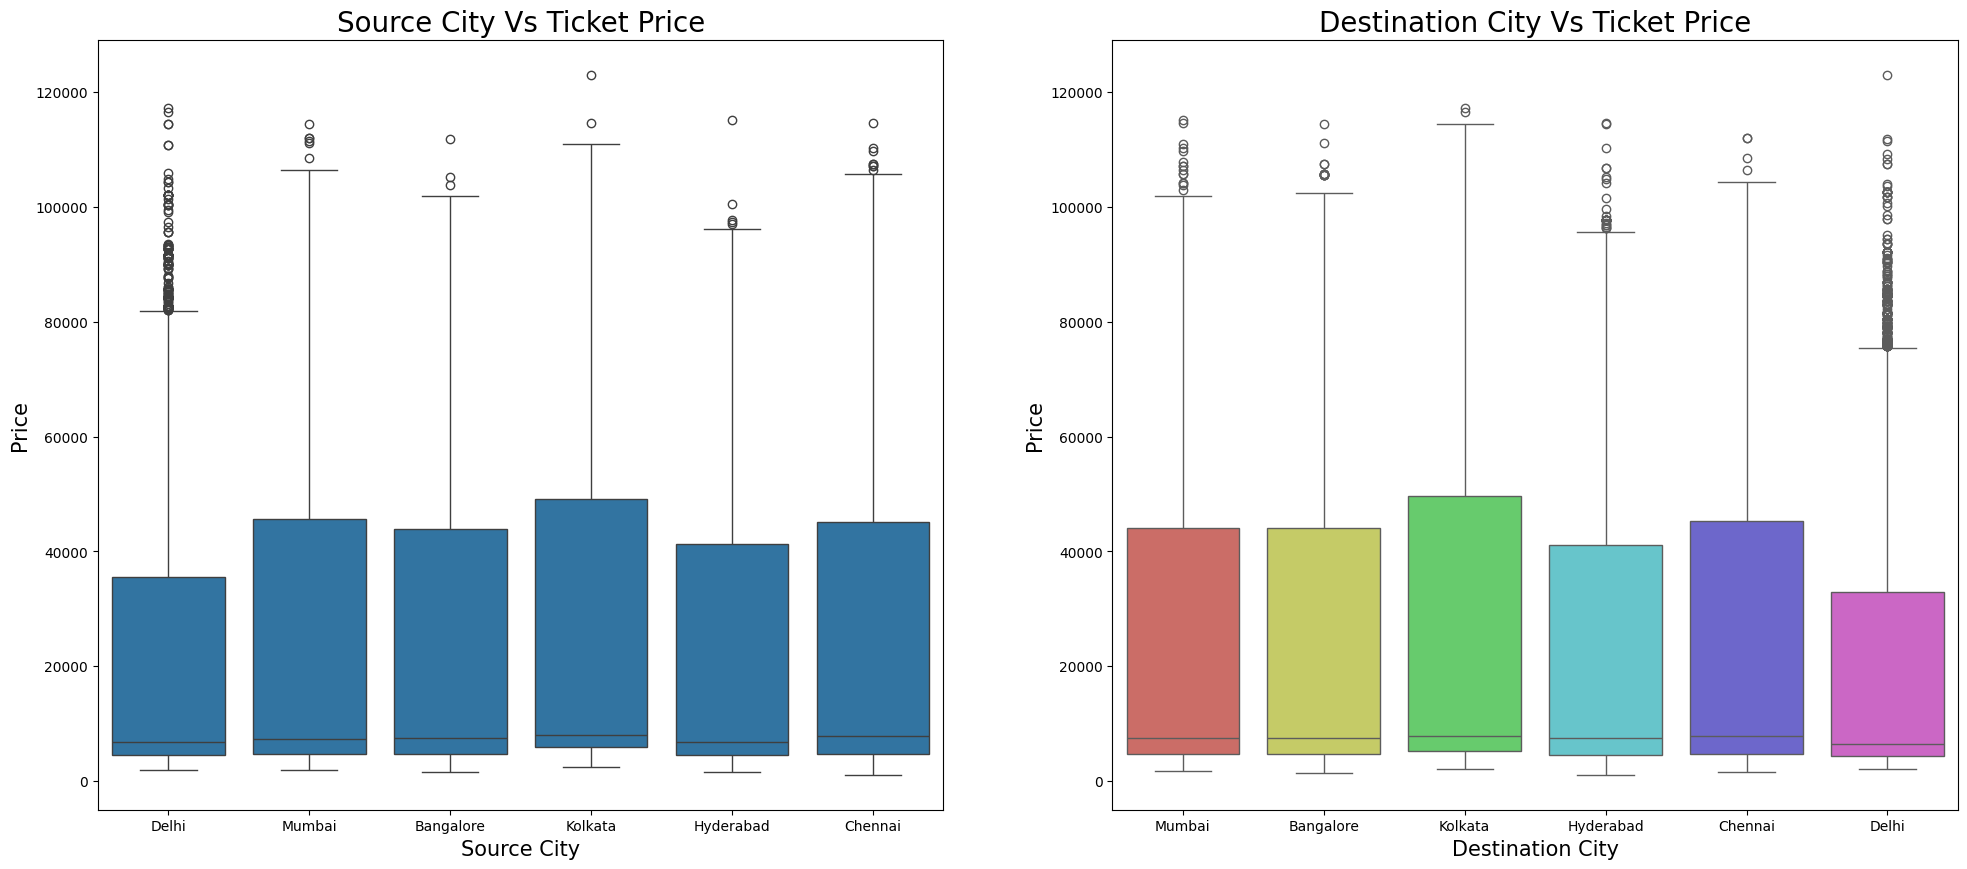

In [ ]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

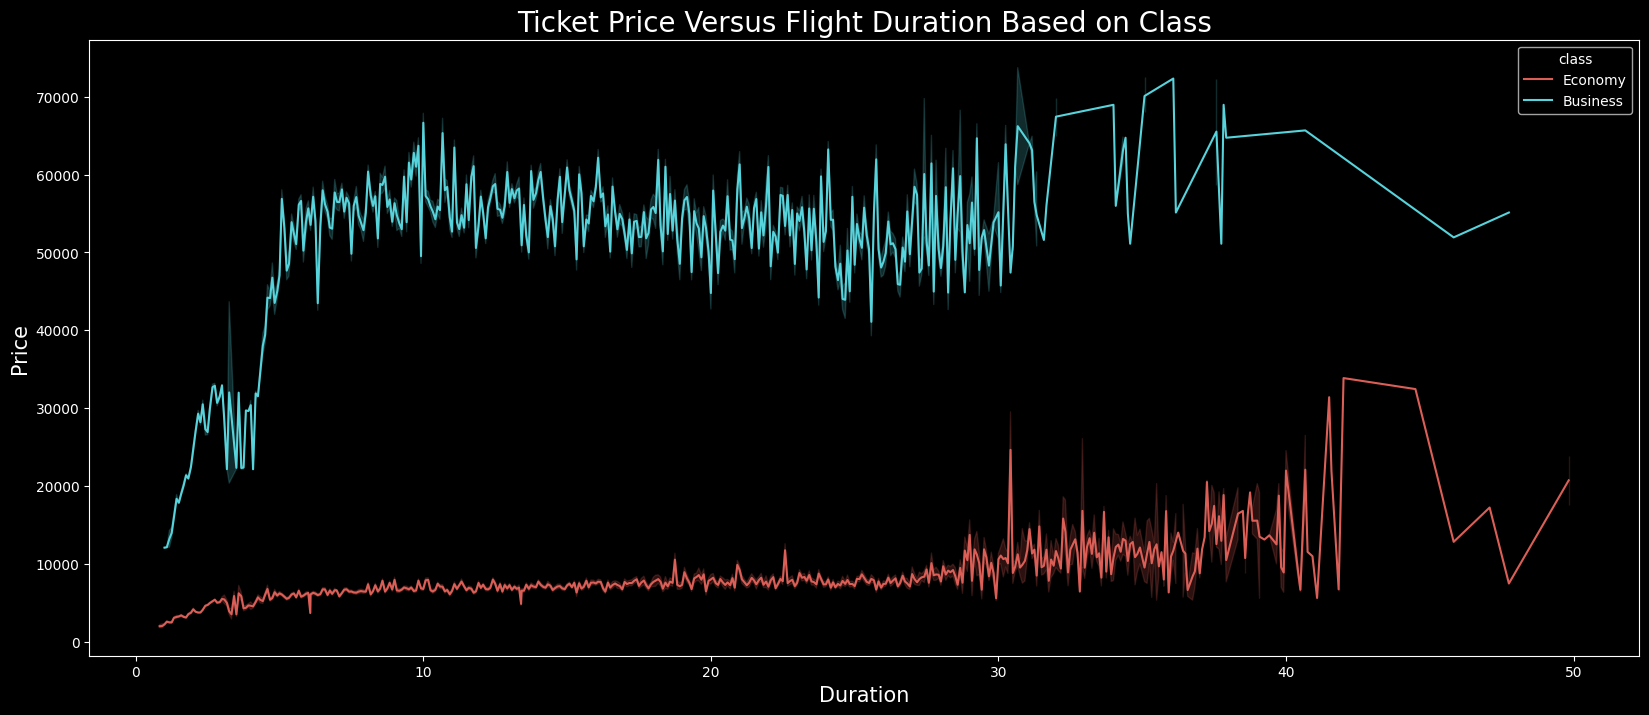

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()


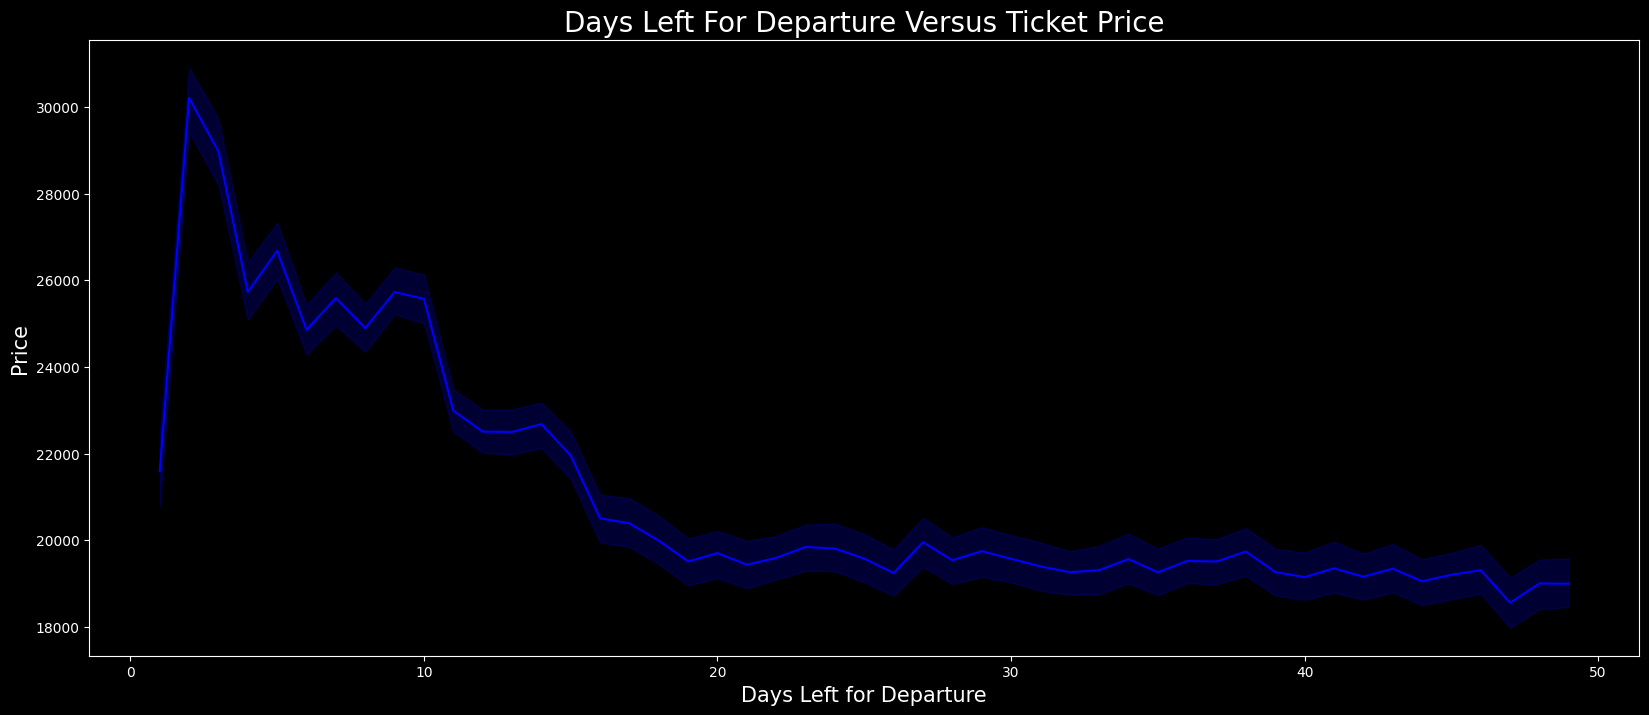

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

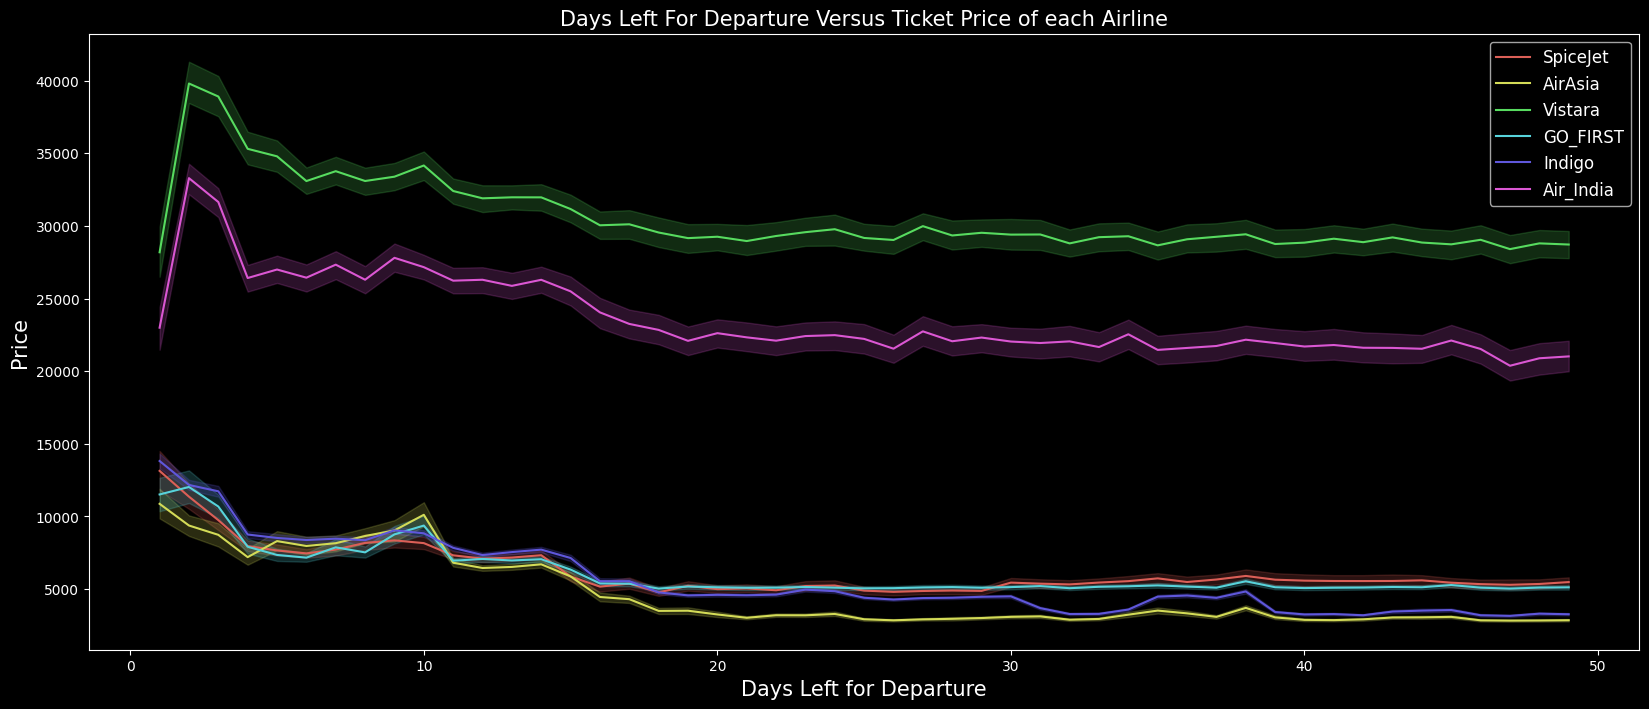

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [ ]:
df.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


In [ ]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


In [ ]:
df_bk=df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])


In [ ]:
x=df.drop(['price'],axis=1)
y=df['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [ ]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [ ]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np

# Initialize an empty list to store results
results_list = []


# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelLO=linear_model.Lasso(alpha=0.1)


# Evalution matrix for all the algorithms

MM = [modelmlg,modeldcr,modelKNN,modelLO]

for models in MM:

    # Fit the model with train data

    models.fit(x_train, y_train)

    # Predict the model with test data

    y_pred = models.predict(x_test)

    # Print the model name

    print('Model Name: ', models)

    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Evaluation of MAPE

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    # Calculate Adjusted R squared values

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    # Define the result dictionary for the current model
    result_dict = {'Model Name': str(models),
                   'Mean_Absolute_Error_MAE': metrics.mean_absolute_error(y_test, y_pred),
                   'Adj_R_Square': adjusted_r_squared,
                   'Root_Mean_Squared_Error_RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
                   'Mean_Absolute_Percentage_Error_MAPE': result,
                   'Mean_Squared_Error_MSE': metrics.mean_squared_error(y_test, y_pred),
                   'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
                   'R2_score': metrics.r2_score(y_test, y_pred)}

    # Append the result dictionary to the list
    results_list.append(result_dict)
    #-------------------------------------------------------------------------------------------

# Convert the list of dictionaries to a DataFrame
Results = pd.DataFrame(results_list)

# Print the results DataFrame
print(Results)



Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4630.296
Mean Squared Error (MSE): 49070241.265
Root Mean Squared Error (RMSE): 7005.015
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage Error (MAPE): 43.89 %
Adj R Square:  0.904653
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1259.665
Mean Squared Error (MSE): 13821462.011
Root Mean Squared Error (RMSE): 3717.723
R2_score: 0.973145
Root Mean Squared Log Error (RMSLE): 8.221
Mean Absolute Percentage Error (MAPE): 8.61 %
Adj R Square:  0.973144
------------------------------------------------------------------------------------------------------------
Model Name:  KNeighborsRegressor()
Mean Absolute Error (MAE): 1853.747
Mean Squared Error (MSE): 14586829.596
Root Mean Squared Error (RMSE): 3819.271
R2_score: 0.971658
Root Mean Squared Log Error (RMSLE): 8.248
Mea

In [ ]:
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),4630.295614,0.904653,7005.015436,43.888567,4.907024e+07,8.854382,0.904656
1,DecisionTreeRegressor(),1259.665264,0.973144,3717.722691,8.609252,1.382146e+07,8.220867,0.973145
2,KNeighborsRegressor(),1853.746812,0.971657,3819.270820,11.109409,1.458683e+07,8.247815,0.971658
3,Lasso(alpha=0.1),4630.179207,0.904653,7005.006183,43.885459,4.907011e+07,8.854380,0.904656


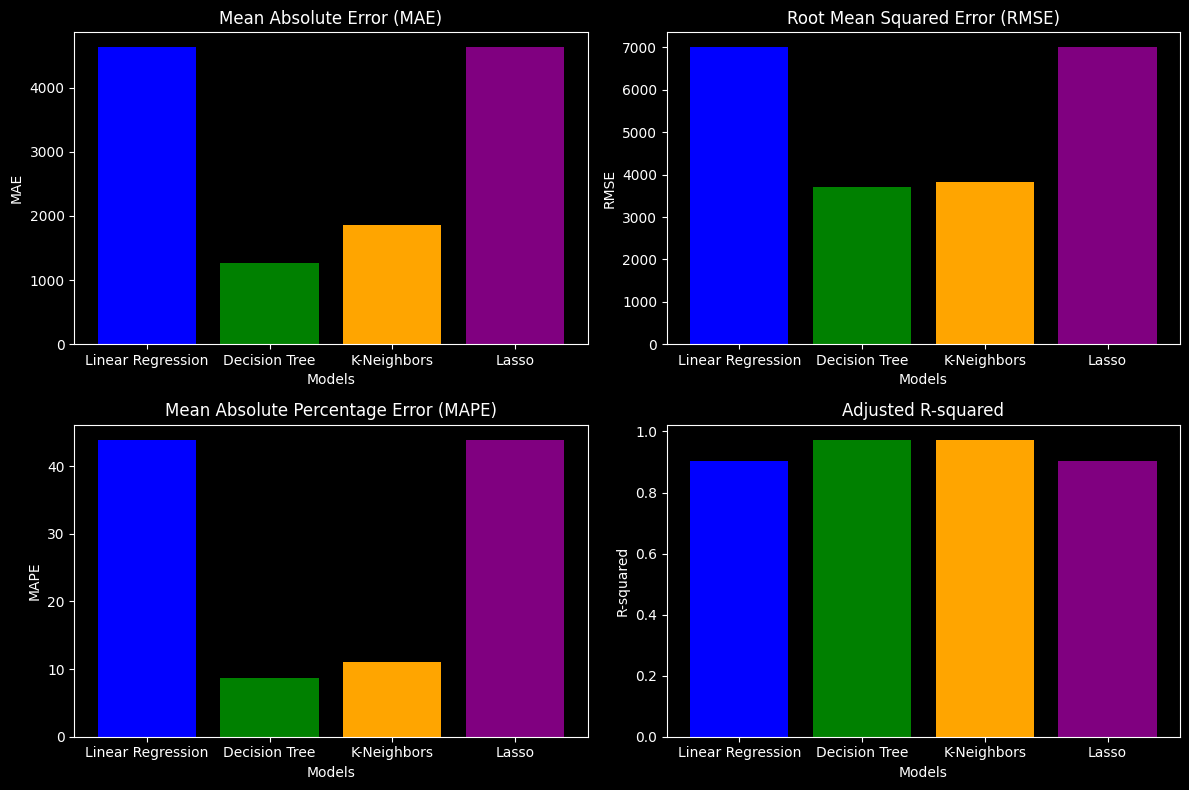

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['Linear Regression', 'Decision Tree', 'K-Neighbors', 'Lasso']

# Metrics (taken from the provided table)
mae_values = [4630.30, 1259.67, 1853.75, 4630.18]
rmse_values = [7005.02, 3717.72, 3819.27, 7005.01]
mape_values = [43.89, 8.61, 11.11, 43.89]
r2_values = [0.9047, 0.9731, 0.9717, 0.9047]

# Plotting the metrics for each model
plt.figure(figsize=(12, 8))

# Mean Absolute Error (MAE)
plt.subplot(2, 2, 1)
plt.bar(models, mae_values, color=['blue', 'green', 'orange', 'purple'])
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Models')
plt.ylabel('MAE')

# Root Mean Squared Error (RMSE)
plt.subplot(2, 2, 2)
plt.bar(models, rmse_values, color=['blue', 'green', 'orange', 'purple'])
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Models')
plt.ylabel('RMSE')

# Mean Absolute Percentage Error (MAPE)
plt.subplot(2, 2, 3)
plt.bar(models, mape_values, color=['blue', 'green', 'orange', 'purple'])
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Models')
plt.ylabel('MAPE')

# Adjusted R-squared
plt.subplot(2, 2, 4)
plt.bar(models, r2_values, color=['blue', 'green', 'orange', 'purple'])
plt.title('Adjusted R-squared')
plt.xlabel('Models')
plt.ylabel('R-squared')

plt.tight_layout()
plt.show()


In [ ]:
models=['LinearRegression','KNeighborsRegressor','DecisionTreeRegressor','Lasso Regression']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,KNeighborsRegressor,0.973144,1259.665264,3717.722691,8.609252,1.382146e+07,8.220867,0.973145
1,DecisionTreeRegressor,0.971657,1853.746812,3819.270820,11.109409,1.458683e+07,8.247815,0.971658
2,LinearRegression,0.904653,4630.295614,7005.015436,43.888567,4.907024e+07,8.854382,0.904656
3,Lasso Regression,0.904653,4630.179207,7005.006183,43.885459,4.907011e+07,8.854380,0.904656


In [ ]:
#Trainig the model with
modelKNN.fit(x_train, y_train)

# Predict the model with test data

y_pred = modelKNN.predict(x_test)

In [ ]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

In [ ]:
result.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
116649,Vistara,UK-657,Bangalore,Morning,two_or_more,Night,Chennai,Economy,8.75,15,19563,19563,17475.4
65389,Indigo,6E-945,Mumbai,Afternoon,one,Night,Kolkata,Economy,6.08,23,5843,5843,5919.2
259348,Vistara,UK-858,Bangalore,Early_Morning,one,Evening,Chennai,Business,13.25,12,44280,44280,48645.6
174202,Indigo,6E-6151,Hyderabad,Morning,one,Evening,Kolkata,Economy,7.25,32,2057,2057,4325.2
234158,Vistara,UK-970,Mumbai,Morning,one,Night,Bangalore,Business,11.67,49,69168,69168,67376.0
9111,GO_FIRST,G8-404,Delhi,Morning,one,Afternoon,Mumbai,Economy,5.17,45,5886,5886,5720.8
155350,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26,2228,2228,2617.2
287287,Vistara,UK-830,Hyderabad,Morning,one,Evening,Chennai,Business,9.58,42,69515,69515,58234.6
56737,Air_India,AI-669,Mumbai,Morning,one,Morning,Bangalore,Economy,20.92,23,8906,8906,6591.8
113334,Air_India,AI-573,Bangalore,Afternoon,one,Night,Hyderabad,Economy,8.42,32,5109,5109,6123.0


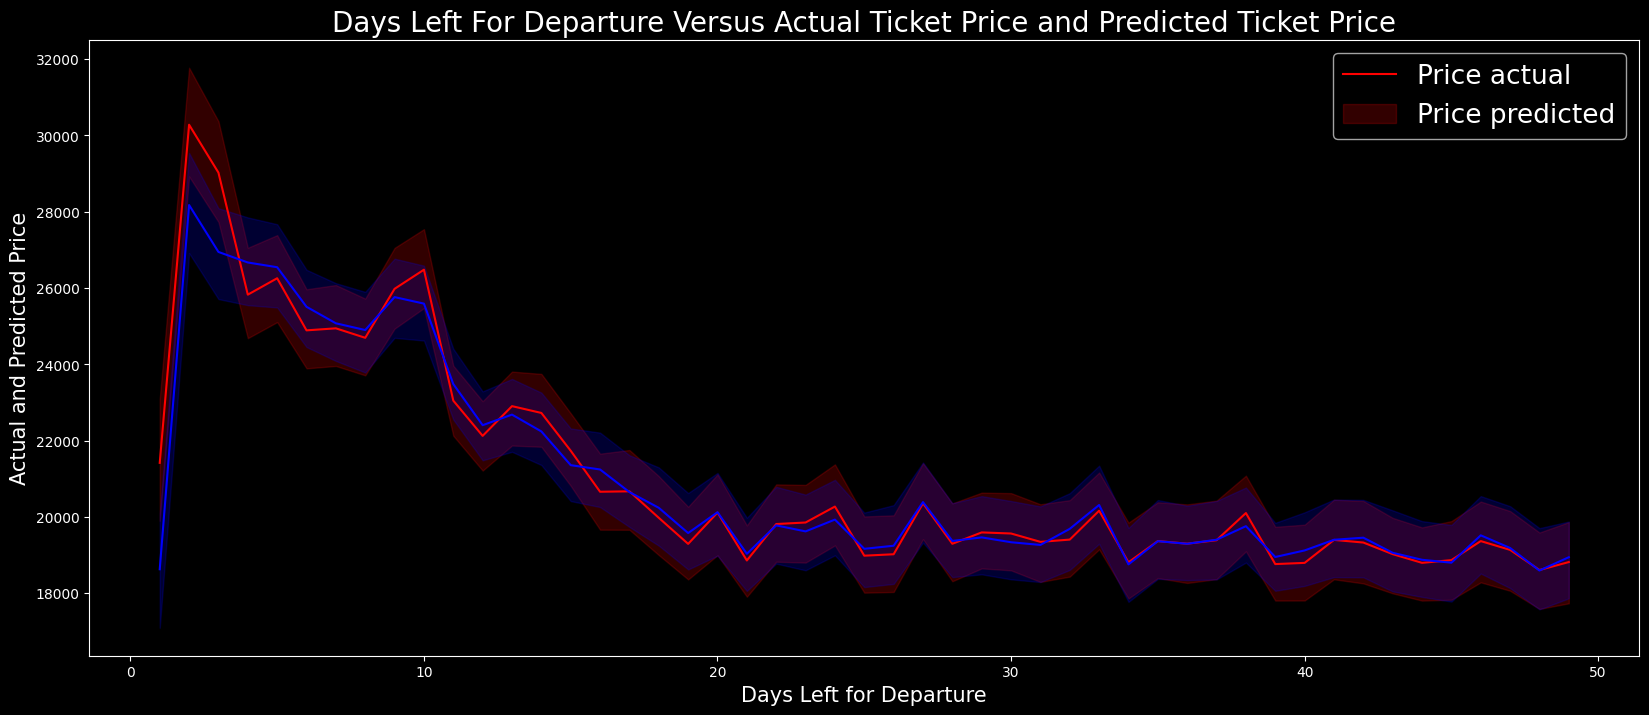

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

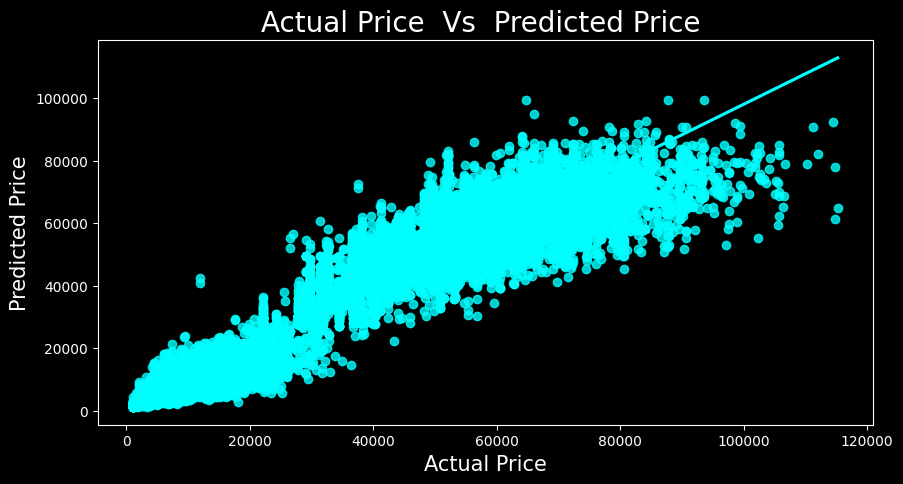

In [ ]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='cyan')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

In [ ]:
#data sampling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats  # Ensure there are no invisible characters here

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/Clean_Dataset.csv"
original_dataset = pd.read_csv(file_path)

# Specify the sample size
sample_size = 5000

# Randomly sample the DataFrame
random_sample = original_dataset.sample(n=sample_size, random_state=42)

# Print the selected rows
print("Randomly Sampled Rows:")
print(random_sample)

# Print the size of the table
print("\nSize of the Table (Number of Rows, Number of Columns):", random_sample.shape)

Randomly Sampled Rows:
        Unnamed: 0    airline  flight source_city departure_time        stops  \
27131        27131  Air_India  AI-506       Delhi        Morning          one   
266857      266857    Vistara  UK-706     Kolkata        Morning          one   
141228      141228    Vistara  UK-772     Kolkata        Morning          one   
288329      288329    Vistara  UK-824     Chennai          Night          one   
97334        97334  Air_India  AI-501   Bangalore      Afternoon          one   
...            ...        ...     ...         ...            ...          ...   
45755        45755  Air_India  AI-570      Mumbai  Early_Morning          one   
244345      244345    Vistara  UK-970      Mumbai        Morning          one   
112697      112697    Vistara  UK-864   Bangalore        Evening          one   
110190      110190  Air_India  AI-738   Bangalore        Morning  two_or_more   
4148          4148  Air_India  AI-411       Delhi  Early_Morning          one   

    

In [ ]:
sample_size = len(random_sample)
print("Size of Random Sample:", sample_size)

Size of Random Sample: 5000


In [ ]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

# Create GradientBoostingRegressor model with valid loss parameter
modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]

for models in MM:

    # Fit the model with train data

    models.fit(x_train, y_train)

    # Predict the model with test data

    y_pred = models.predict(x_test)

    # Print the model name

    print('Model Name: ', models)

    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))

    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
              }
    Results = Results.append(new_row, ignore_index=True)
    #------------------------------------------------------------

Model Name:  LinearRegression()
Root Mean Squared Error (RMSE): 7005.015
Model Name:  DecisionTreeRegressor()
Root Mean Squared Error (RMSE): 3689.852
Model Name:  RandomForestRegressor()
Root Mean Squared Error (RMSE): 2864.44
Model Name:  KNeighborsRegressor()
Root Mean Squared Error (RMSE): 3819.271
Model Name:  ExtraTreesRegressor()
Root Mean Squared Error (RMSE): 2799.987
Model Name:  GradientBoostingRegressor()
Root Mean Squared Error (RMSE): 4713.929
Model Name:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/Clean_Dataset.csv"
original_dataset = pd.read_csv(file_path)

# Specify the sample size
sample_size = 10000

# Randomly sample the DataFrame
random_sample = original_dataset.sample(n=sample_size, random_state=42)

# Print the selected rows
print("Randomly Sampled Rows:")
print(random_sample)

# Print the size of the table
print("\nSize of the Table (Number of Rows, Number of Columns):", random_sample.shape)

Randomly Sampled Rows:
        Unnamed: 0    airline  flight source_city departure_time stops  \
27131        27131  Air_India  AI-506       Delhi        Morning   one   
266857      266857    Vistara  UK-706     Kolkata        Morning   one   
141228      141228    Vistara  UK-772     Kolkata        Morning   one   
288329      288329    Vistara  UK-824     Chennai          Night   one   
97334        97334  Air_India  AI-501   Bangalore      Afternoon   one   
...            ...        ...     ...         ...            ...   ...   
27874        27874  Air_India  AI-803       Delhi  Early_Morning   one   
56233        56233   GO_FIRST  G8-575      Mumbai  Early_Morning   one   
98649        98649    Vistara  UK-814   Bangalore          Night   one   
250921      250921    Vistara  UK-854   Bangalore        Evening  zero   
244645      244645  Air_India  AI-660      Mumbai        Evening   one   

         arrival_time destination_city     class  duration  days_left  price  
27131   E

In [ ]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

# Create GradientBoostingRegressor model with valid loss parameter
modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]

for models in MM:

    # Fit the model with train data

    models.fit(x_train, y_train)

    # Predict the model with test data

    y_pred = models.predict(x_test)

    # Print the model name

    print('Model Name: ', models)

    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))

    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
              }
    Results = Results.append(new_row, ignore_index=True)
    #------------------------------------------------------------

Model Name:  LinearRegression()
Root Mean Squared Error (RMSE): 7005.015
Model Name:  DecisionTreeRegressor()
Root Mean Squared Error (RMSE): 3706.172
Model Name:  RandomForestRegressor()
Root Mean Squared Error (RMSE): 2864.486
Model Name:  KNeighborsRegressor()
Root Mean Squared Error (RMSE): 3819.271
Model Name:  ExtraTreesRegressor()
Root Mean Squared Error (RMSE): 2793.014
Model Name:  GradientBoostingRegressor()
Root Mean Squared Error (RMSE): 4713.93
Model Name:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/Clean_Dataset.csv"
original_dataset = pd.read_csv(file_path)

# Specify the sample size
sample_size = 20000

# Randomly sample the DataFrame
random_sample = original_dataset.sample(n=sample_size, random_state=42)

# Print the selected rows
print("Randomly Sampled Rows:")
print(random_sample)

# Print the size of the table
print("\nSize of the Table (Number of Rows, Number of Columns):", random_sample.shape)

Randomly Sampled Rows:
        Unnamed: 0    airline   flight source_city departure_time stops  \
27131        27131  Air_India   AI-506       Delhi        Morning   one   
266857      266857    Vistara   UK-706     Kolkata        Morning   one   
141228      141228    Vistara   UK-772     Kolkata        Morning   one   
288329      288329    Vistara   UK-824     Chennai          Night   one   
97334        97334  Air_India   AI-501   Bangalore      Afternoon   one   
...            ...        ...      ...         ...            ...   ...   
231025      231025    Vistara   UK-865      Mumbai        Evening  zero   
12314        12314   GO_FIRST   G8-113       Delhi  Early_Morning  zero   
18393        18393  Air_India   AI-409       Delhi        Morning   one   
145678      145678   SpiceJet  SG-3835     Kolkata          Night   one   
260931      260931    Vistara   UK-850   Bangalore        Evening   one   

         arrival_time destination_city     class  duration  days_left  price

In [ ]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

# Create GradientBoostingRegressor model with valid loss parameter
modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]

for models in MM:

    # Fit the model with train data

    models.fit(x_train, y_train)

    # Predict the model with test data

    y_pred = models.predict(x_test)

    # Print the model name

    print('Model Name: ', models)

    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))

    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
              }
    Results = Results.append(new_row, ignore_index=True)
    #------------------------------------------------------------

Model Name:  LinearRegression()
Root Mean Squared Error (RMSE): 7005.015
Model Name:  DecisionTreeRegressor()
Root Mean Squared Error (RMSE): 3703.707
Model Name:  RandomForestRegressor()
Root Mean Squared Error (RMSE): 2866.635
Model Name:  KNeighborsRegressor()
Root Mean Squared Error (RMSE): 3819.271
Model Name:  ExtraTreesRegressor()
Root Mean Squared Error (RMSE): 2794.547
Model Name:  GradientBoostingRegressor()
Root Mean Squared Error (RMSE): 4713.93
Model Name:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/Clean_Dataset.csv"
original_dataset = pd.read_csv(file_path)

# Specify the sample size
sample_size = 30000

# Randomly sample the DataFrame
random_sample = original_dataset.sample(n=sample_size, random_state=42)

# Print the selected rows
print("Randomly Sampled Rows:")
print(random_sample)

# Print the size of the table
print("\nSize of the Table (Number of Rows, Number of Columns):", random_sample.shape)

Randomly Sampled Rows:
        Unnamed: 0    airline   flight source_city departure_time stops  \
27131        27131  Air_India   AI-506       Delhi        Morning   one   
266857      266857    Vistara   UK-706     Kolkata        Morning   one   
141228      141228    Vistara   UK-772     Kolkata        Morning   one   
288329      288329    Vistara   UK-824     Chennai          Night   one   
97334        97334  Air_India   AI-501   Bangalore      Afternoon   one   
...            ...        ...      ...         ...            ...   ...   
31717        31717   GO_FIRST  G8-7541       Delhi  Early_Morning   one   
208998      208998    Vistara   UK-829       Delhi  Early_Morning   one   
144093      144093   SpiceJet  SG-3835     Kolkata          Night   one   
256502      256502    Vistara   UK-846   Bangalore        Morning   one   
69746        69746   SpiceJet  SG-8152      Mumbai  Early_Morning   one   

         arrival_time destination_city     class  duration  days_left  price

In [ ]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

# Create GradientBoostingRegressor model with valid loss parameter
modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]

for models in MM:

    # Fit the model with train data

    models.fit(x_train, y_train)

    # Predict the model with test data

    y_pred = models.predict(x_test)

    # Print the model name

    print('Model Name: ', models)

    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))

    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
              }
    Results = Results.append(new_row, ignore_index=True)
    #------------------------------------------------------------

Model Name:  LinearRegression()
Root Mean Squared Error (RMSE): 7005.015
Model Name:  DecisionTreeRegressor()
Root Mean Squared Error (RMSE): 3736.711
Model Name:  RandomForestRegressor()
Root Mean Squared Error (RMSE): 2863.962
Model Name:  KNeighborsRegressor()
Root Mean Squared Error (RMSE): 3819.271
